In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


# Step 1: Load the dataset
file_path = "NFLX (1).csv"  # Update with correct path
df = pd.read_csv(file_path)



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2018-02-05 to 2022-02-04
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1009 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB
None
                 Value
Date                  
2018-02-05  254.259995
2018-02-06  265.720001
2018-02-07  264.559998
2018-02-08  250.100006
2018-02-09  249.470001


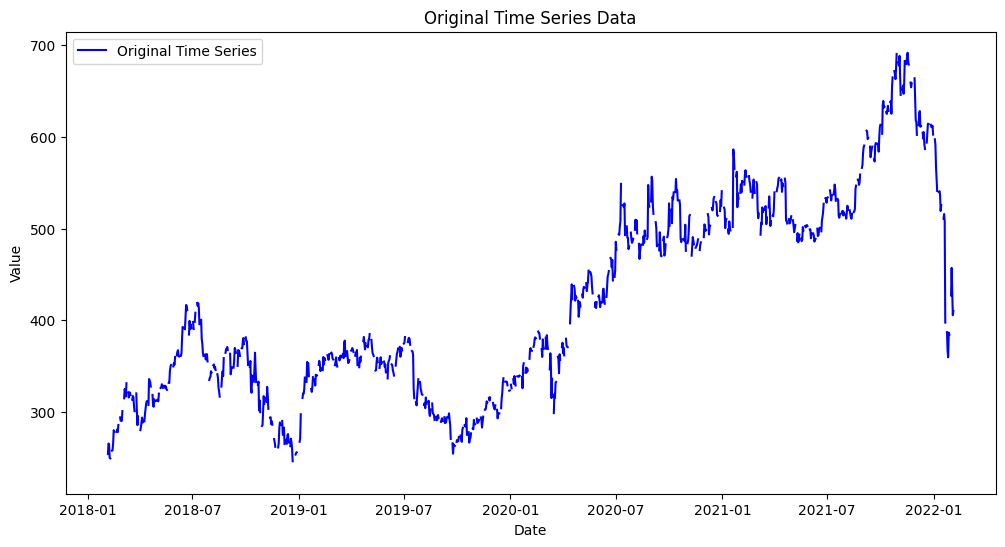

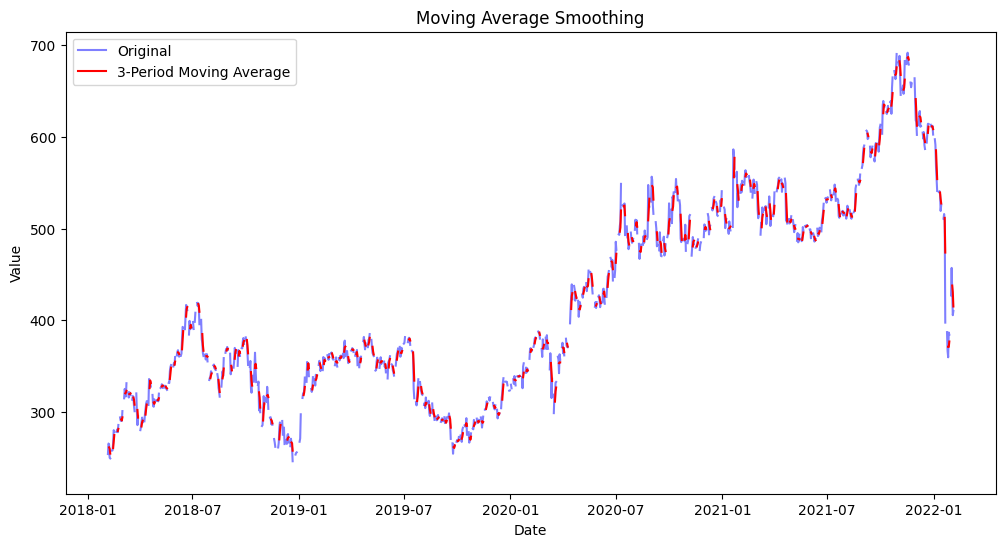

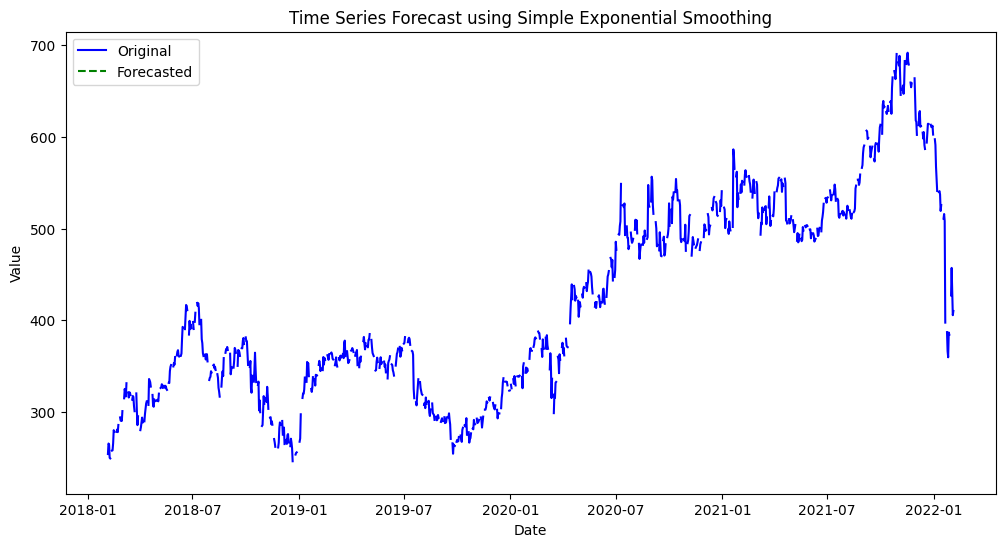

📈 Forecasted Values (Next 12 Periods):
            Forecast
2022-02-05       NaN
2022-02-06       NaN
2022-02-07       NaN
2022-02-08       NaN
2022-02-09       NaN
2022-02-10       NaN
2022-02-11       NaN
2022-02-12       NaN
2022-02-13       NaN
2022-02-14       NaN
2022-02-15       NaN
2022-02-16       NaN


In [21]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

# Use the 'Close' price (or adjust as needed)
df = df[['Close']].copy()
df.rename(columns={'Close': 'Value'}, inplace=True)

# Infer frequency if not monthly/daily
df = df.asfreq(pd.infer_freq(df.index))

# Check dataset info after preprocessing
print(df.info())
print(df.head())

# Step 2: Visualizing the Original Time Series
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label="Original Time Series", color='blue')
plt.title("Original Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 3: Apply Moving Average Smoothing
df['Moving_Avg'] = df['Value'].rolling(window=3).mean()

# Plot Smoothed Data
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label="Original", color='blue', alpha=0.5)
plt.plot(df['Moving_Avg'], label="3-Period Moving Average", color='red')
plt.title("Moving Average Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 4: Simple Exponential Smoothing
model = SimpleExpSmoothing(df['Value'], initialization_method="heuristic")
fitted_model = model.fit(optimized=True)

# Step 5: Forecast Future Values (Next 12 Periods)
forecast_steps = 12
forecast_values = fitted_model.forecast(steps=forecast_steps)

# Create future date index
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq=df.index.freq)[1:]
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_index)

# Step 6: Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label="Original", color='blue')
plt.plot(forecast_df['Forecast'], label="Forecasted", color='green', linestyle='dashed')
plt.title("Time Series Forecast using Simple Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 7: Display Forecasted Values
print("📈 Forecasted Values (Next 12 Periods):")
print(forecast_df)